In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)

stud = pd.read_csv('stud_math.xls')

## Предобработка

In [2]:
nan_str = {}
df = stud.copy(deep=True)

# Функция для изменения пустых строк в столбцах 
def nan_num_impr(col):
    for row in col:
        stud[row] = stud[row].apply(lambda x: None if math.isnan(x)
                                    else x)
        
        
def nan_str_impr(col):
    for row in col:
        stud[row] = stud[row].astype(str).apply(lambda x: None if pd.isnull(x) 
                                    else None if x=='nan'
                                    else None if x.strip()==''
                                    else x)
        
# Вывод гистограмм и информации
def information(col):
    stud[col].hist()
    print(stud[col].describe())
    if type(col)==list:
        for ncol in col:
            print(stud[ncol].value_counts())
    else:
        print(stud[col].value_counts())
    
    
# Определение выбросов
def outliers(col, bins=10, rrange=(0, 10), gsense=False):
    median = stud[col].median()
    perc75 = stud[col].quantile(0.75)
    perc25 = stud[col].quantile(0.25)
    IQR = perc75 - perc25
    f = perc25 - 1.5*IQR
    l = perc75 + 1.5*IQR
    
    print('25-й перцентиль: {},'.format(perc25), 
          '75-й перцентиль: {},'.format(perc75), 
          "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=f, l=l))
    
    stud[col].loc[stud[col].between(f, l)].hist(bins=bins, range=rrange, label='IQR')
    if gsense==True:
        stud[col].loc[stud[col] <= stud[col].max()].hist(alpha=0.5, 
                                                        range=rrange,
                                                        label='Здравый смысл')
    plt.legend()
    

def get_boxplot(col):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=col, y='score', data=stud.loc[stud.loc[:, col].isin
                                                (stud.loc[:, col].value_counts().index[:])], ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for '+col)
    plt.show()

## Первичная обработка данных

In [3]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

### Количество пустых строк в каждом столбце:

In [4]:
# Нахождение количества пустых значений в каждом столбце
for col in df.columns:
    nan_str[col] = df[df[col].astype(str).str.contains('nan')].sex.count()
    
nan_str

{'school': 0,
 'sex': 0,
 'age': 0,
 'address': 17,
 'famsize': 27,
 'Pstatus': 45,
 'Medu': 3,
 'Fedu': 24,
 'Mjob': 19,
 'Fjob': 36,
 'reason': 17,
 'guardian': 31,
 'traveltime': 28,
 'studytime': 7,
 'failures': 22,
 'schoolsup': 9,
 'famsup': 39,
 'paid': 40,
 'activities': 14,
 'nursery': 16,
 'studytime, granular': 7,
 'higher': 20,
 'internet': 34,
 'romantic': 31,
 'famrel': 27,
 'freetime': 11,
 'goout': 8,
 'health': 15,
 'absences': 12,
 'score': 6}

In [5]:
# Исправляю пустые строки в каждом столбце, который имеет значения object
nan_str_impr(['address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
          'reason', 'guardian',  'schoolsup', 'famsup', 
          'paid', 'activities', 'nursery', 'higher', 
          'internet', 'romantic'])

# Исправляю пусты строки в столбцах, которые имеют значения float, int
nan_num_impr(['Medu', 'Fedu', 'traveltime', 'studytime', 'failures',  
              'studytime, granular','famrel', 'freetime', 'goout', 
              'health', 'absences', 'score'])

## Поиск выбросов

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64


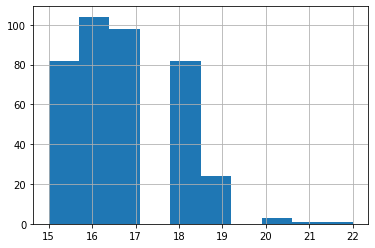

In [6]:
# age

information('age')

25-й перцентиль: 16.0, 75-й перцентиль: 18.0, IQR: 2.0,  Границы выбросов: [13.0, 21.0].


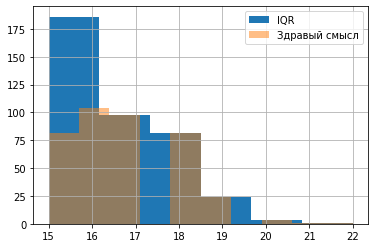

In [7]:
outliers('age', bins=6, rrange=(15, 22), gsense=True)

Формула интерквартильного расстояния показывает, что выбросом является значение 22, но по условию в данном столбце находятся значения от 15 до 22, поэтому буду считать, что выбросов нет

             Medu        Fedu
count  392.000000  371.000000
mean     2.750000    2.614555
std      1.098127    2.228732
min      0.000000    0.000000
25%      2.000000    2.000000
50%      3.000000    2.000000
75%      4.000000    3.000000
max      4.000000   40.000000
4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64
2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64


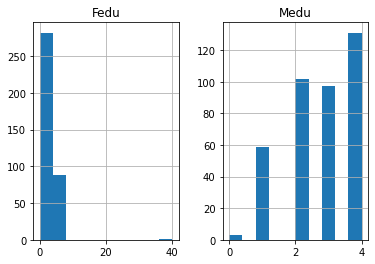

In [8]:
# Medu & Fedu

information(['Medu', 'Fedu'])

25-й перцентиль: 2.0, 75-й перцентиль: 4.0, IQR: 2.0,  Границы выбросов: [-1.0, 7.0].


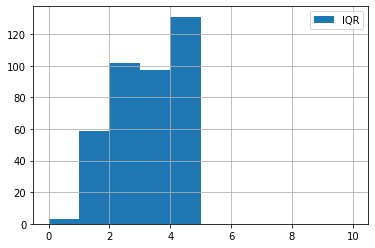

In [9]:
outliers('Medu')

25-й перцентиль: 2.0, 75-й перцентиль: 3.0, IQR: 1.0,  Границы выбросов: [0.5, 4.5].


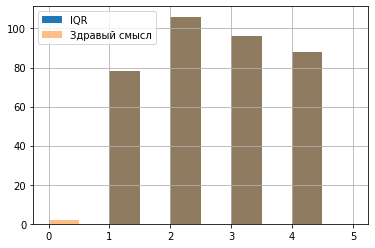

In [10]:
outliers('Fedu', rrange=(0, 5), gsense=True)

In [305]:
stud.loc[11, 'Fedu'] = 4 # вариант с заменой

In [11]:
stud = stud.loc[stud.Fedu <= 4.] # вариант с исключением строки, в которой содержится выьрос

Видно, что в Fedu присутствует выброс в виде значения 40, так как это единственная строка, могу предположить, что это ошибка во время сбора данных.
Решил заменить на значение 4 (если будет возможность, хотел бы услышать комментарий от проверяющего, можно ли таким образом рассуждать и присваивать какое-либо значение или всегда лучше сразу отпбрасывать всю строку с выбросом?)

Формула показывает, что значение 0 является выбросом, но я считаю, что такая ситуация возможно и оставлю это значение.

       traveltime   studytime
count  345.000000  363.000000
mean     1.449275    2.027548
std      0.701664    0.840489
min      1.000000    1.000000
25%      1.000000    1.000000
50%      1.000000    2.000000
75%      2.000000    2.000000
max      4.000000    4.000000
1.0    225
2.0     92
3.0     21
4.0      7
Name: traveltime, dtype: int64
2.0    182
1.0     98
3.0     58
4.0     25
Name: studytime, dtype: int64


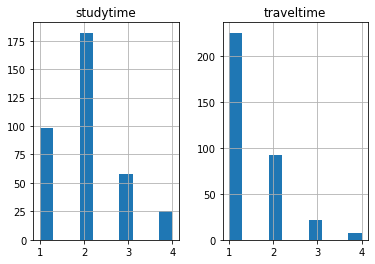

In [12]:
# traveltime & studytime

information(['traveltime', 'studytime'])

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


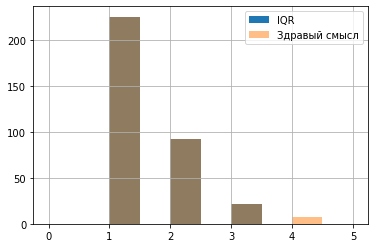

In [13]:
outliers('traveltime', rrange=(0, 5), gsense=True)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


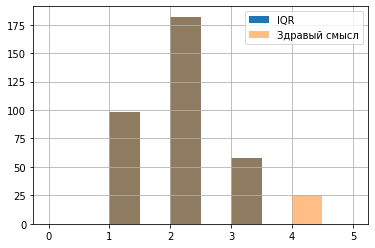

In [14]:
outliers('studytime', rrange=(0, 5), gsense=True)

В этих столбцах также нет значений не указанных в условии, поэтому считаю, что выбросов нет.

count    351.000000
mean       0.336182
std        0.748962
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64
0.0    277
1.0     45
3.0     15
2.0     14
Name: failures, dtype: int64


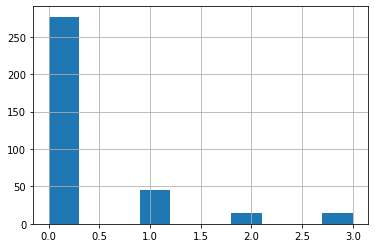

In [15]:
# failures

information('failures')

25-й перцентиль: 0.0, 75-й перцентиль: 0.0, IQR: 0.0,  Границы выбросов: [0.0, 0.0].


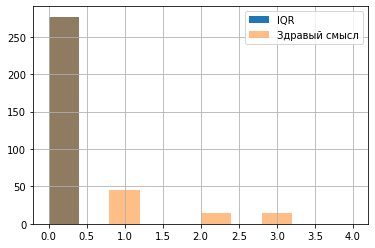

In [16]:
outliers('failures', rrange=(0,4), gsense=True) 

count    363.000000
mean      -6.082645
std        2.521466
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64
-6.0     182
-3.0      98
-9.0      58
-12.0     25
Name: studytime, granular, dtype: int64


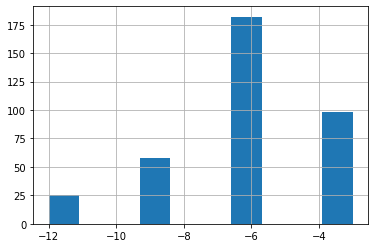

In [17]:
information('studytime, granular')

25-й перцентиль: -6.0, 75-й перцентиль: -3.0, IQR: 3.0,  Границы выбросов: [-10.5, 1.5].


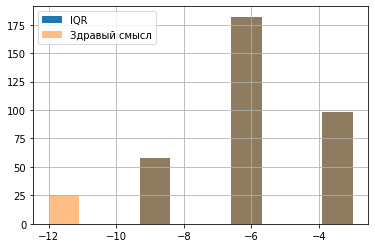

In [18]:
outliers('studytime, granular', rrange=(-12,-3), gsense=True)

In [309]:
# подумать что это за столбец

count    346.000000
mean       3.936416
std        0.939629
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64
 4.0    168
 5.0     95
 3.0     59
 2.0     16
 1.0      7
-1.0      1
Name: famrel, dtype: int64


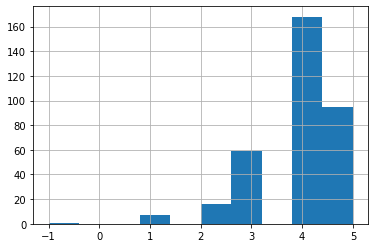

In [19]:
# famrel

information('famrel')

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


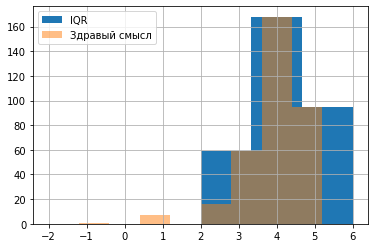

In [20]:
outliers('famrel',bins=6, rrange=(-2, 6), gsense=True)

In [318]:
stud[stud.famrel==-1]
stud.loc[25, 'famrel'] = 1 #вариант с заменой значения

In [21]:
stud = stud.loc[stud.famrel >=1] #вариант с удалением строки

Выброс в виде значения -1, единственная строка, поэтому изменю значение на 1

         freetime       goout
count  336.000000  337.000000
mean     3.229167    3.106825
std      1.003508    1.104852
min      1.000000    1.000000
25%      3.000000    2.000000
50%      3.000000    3.000000
75%      4.000000    4.000000
max      5.000000    5.000000
3.0    134
4.0     97
2.0     54
5.0     34
1.0     17
Name: freetime, dtype: int64
3.0    115
2.0     87
4.0     71
5.0     45
1.0     19
Name: goout, dtype: int64


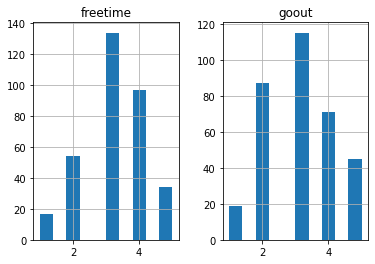

In [22]:
# freetime & goout выбросов не содержат

information(['freetime', 'goout'])

25-й перцентиль: 3.0, 75-й перцентиль: 4.0, IQR: 1.0,  Границы выбросов: [1.5, 5.5].


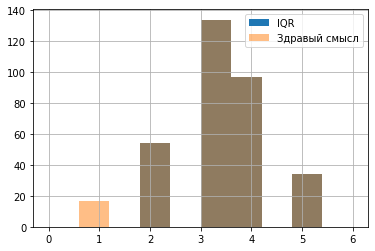

In [23]:
outliers('freetime', rrange=(0, 6), gsense=True)

25-й перцентиль: 1.0, 75-й перцентиль: 2.0, IQR: 1.0,  Границы выбросов: [-0.5, 3.5].


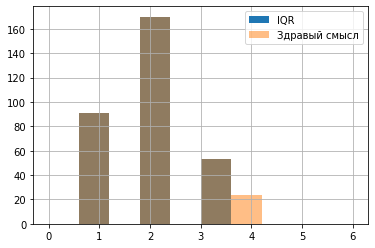

In [24]:
outliers('studytime', rrange=(0, 6), gsense=True)

In [327]:
# проверить зависимоть goout от freetime и влияние на score

count    332.000000
mean       3.469880
std        1.386925
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64
5.0    111
3.0     81
4.0     58
1.0     42
2.0     40
Name: health, dtype: int64


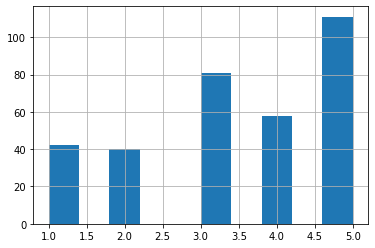

In [25]:
#health

information('health')

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


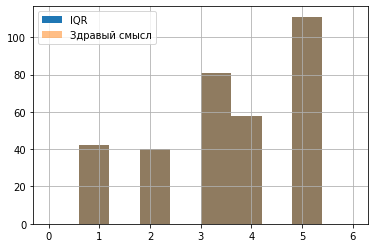

In [26]:
outliers('health', rrange=(0, 6), gsense=True)

count    333.000000
mean       7.315315
std       24.755302
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64
0.0      95
2.0      54
4.0      47
6.0      27
8.0      21
10.0     14
12.0     11
14.0      9
3.0       8
16.0      7
7.0       5
18.0      4
5.0       4
20.0      3
22.0      3
15.0      2
1.0       2
9.0       2
25.0      1
54.0      1
385.0     1
26.0      1
56.0      1
24.0      1
212.0     1
13.0      1
21.0      1
38.0      1
40.0      1
23.0      1
11.0      1
17.0      1
28.0      1
Name: absences, dtype: int64


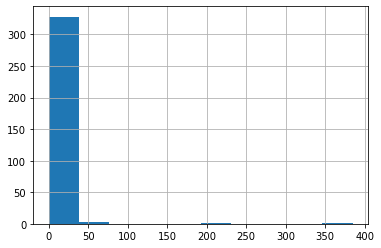

In [27]:
# absences

information('absences')

25-й перцентиль: 3.0, 75-й перцентиль: 5.0, IQR: 2.0,  Границы выбросов: [0.0, 8.0].


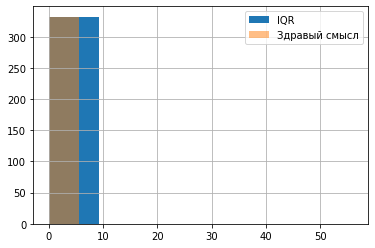

In [28]:
outliers('health', bins=6, rrange=(0, 56), gsense=True)

In [55]:
stud = stud.loc[stud.score <= 170]

В результате данного блока были устранены выбросы, проанализировано распределение признака для числовых переменных

count    339.000000
mean      52.477876
std       22.556214
min        0.000000
25%       42.500000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64
50.0     51
55.0     42
0.0      31
65.0     28
60.0     27
75.0     27
40.0     26
70.0     23
45.0     20
80.0     16
30.0     14
90.0     11
35.0      8
85.0      6
25.0      5
95.0      2
100.0     1
20.0      1
Name: score, dtype: int64


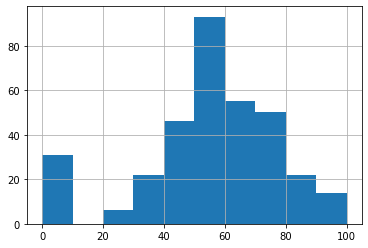

In [49]:
information('score')

25-й перцентиль: 42.5, 75-й перцентиль: 70.0, IQR: 27.5,  Границы выбросов: [1.25, 111.25].


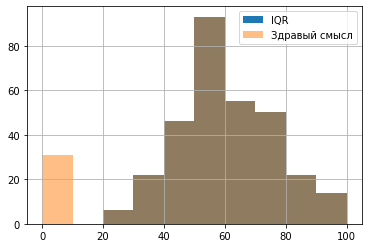

In [53]:
outliers('score', rrange=(0,100), gsense=True)

Выбросов нет

## Корреляционный анализ

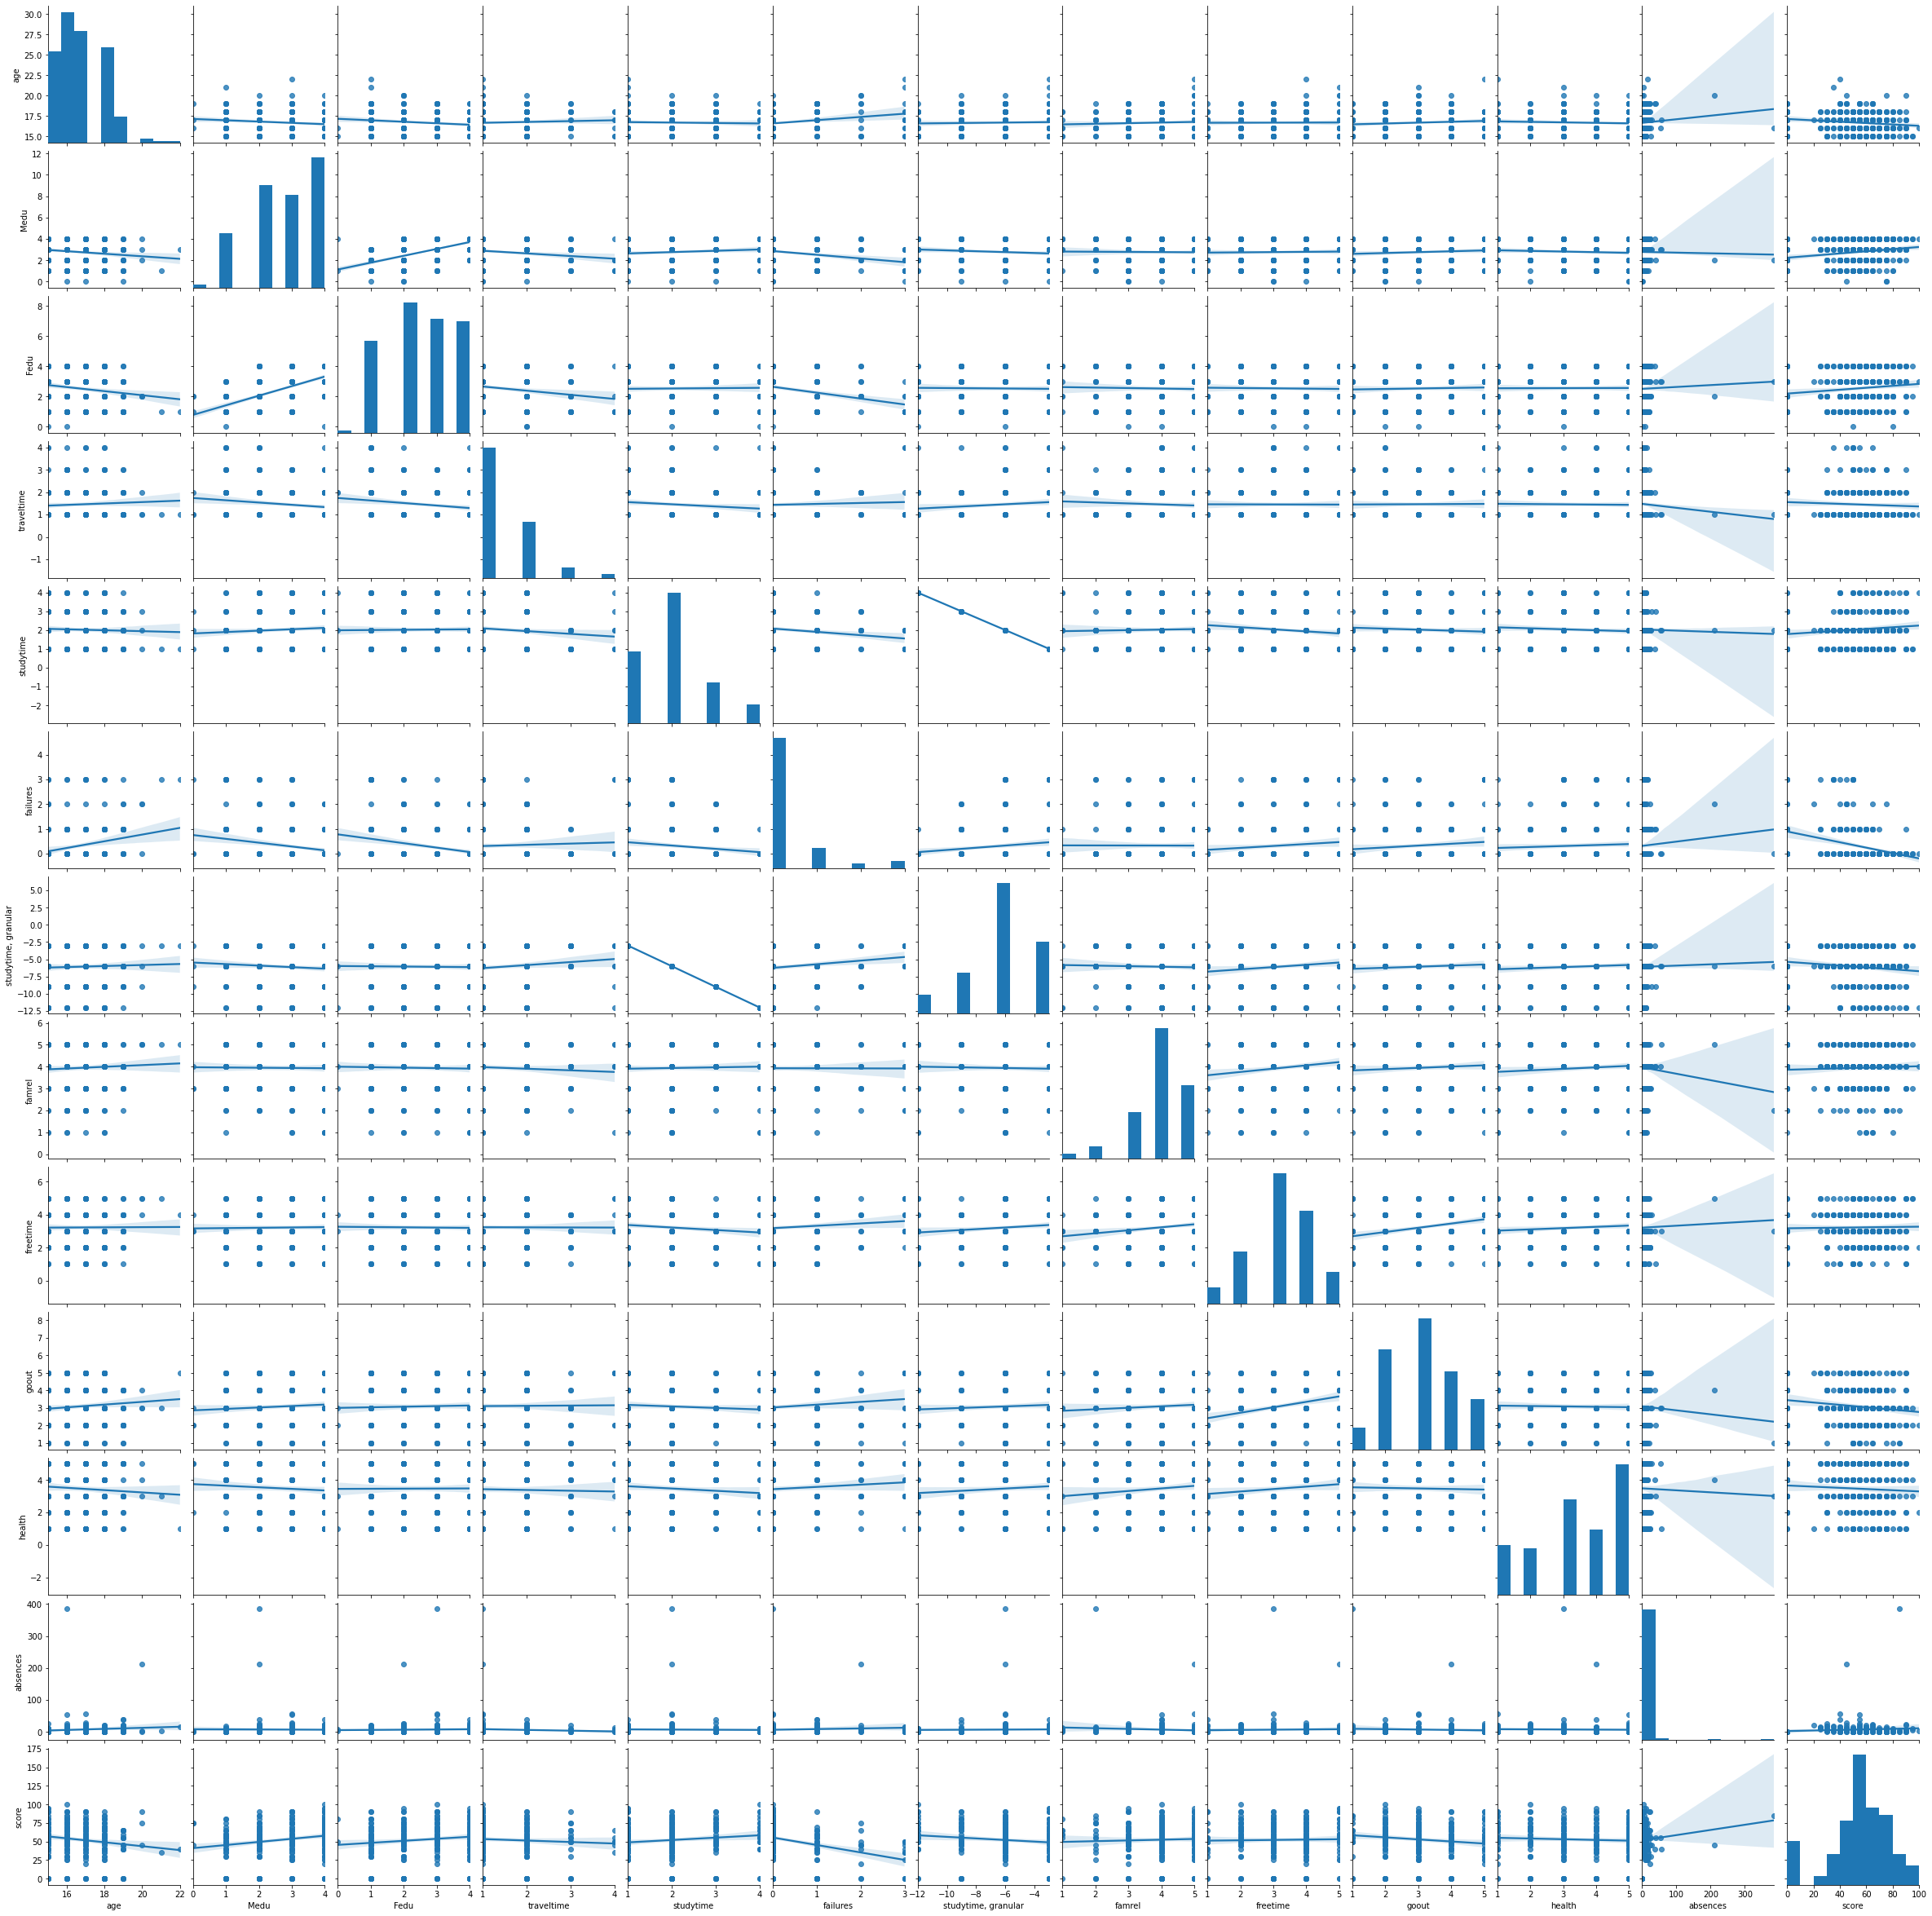

In [30]:
sns.pairplot(stud, kind='reg') 

In [31]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.138453,-0.156740,0.057524,-0.037063,0.231923,0.037063,0.054342,0.006843,0.090474,-0.065562,0.086049,-0.148832
Medu,-0.138453,1.000000,0.639219,-0.158645,0.095827,-0.231730,-0.095827,-0.013728,0.021747,0.081654,-0.076620,-0.014920,0.205382
Fedu,-0.156740,0.639219,1.000000,-0.175858,0.016860,-0.264927,-0.016860,-0.026481,-0.018153,0.033446,0.005446,0.028556,0.132420
traveltime,0.057524,-0.158645,-0.175858,1.000000,-0.119455,0.045316,0.119455,-0.057562,-0.004413,0.009981,-0.023478,-0.064356,-0.062583
studytime,-0.037063,0.095827,0.016860,-0.119455,1.000000,-0.153412,-1.000000,0.029553,-0.129866,-0.067652,-0.085584,-0.018258,0.120601
failures,0.231923,-0.231730,-0.264927,0.045316,-0.153412,1.000000,0.153412,-0.002811,0.106154,0.108608,0.074106,0.060655,-0.331450
"studytime, granular",0.037063,-0.095827,-0.016860,0.119455,-1.000000,0.153412,1.000000,-0.029553,0.129866,0.067652,0.085584,0.018258,-0.120601
famrel,0.054342,-0.013728,-0.026481,-0.057562,0.029553,-0.002811,-0.029553,1.000000,0.165553,0.070447,0.104306,-0.080679,0.040078
freetime,0.006843,0.021747,-0.018153,-0.004413,-0.129866,0.106154,0.129866,0.165553,1.000000,0.282835,0.107645,0.029783,0.021726
goout,0.090474,0.081654,0.033446,0.009981,-0.067652,0.108608,0.067652,0.070447,0.282835,1.000000,-0.027305,-0.052031,-0.137584


Значения studtime & studytime, granular	имеют значение корреляции -1 это говорит о сильной корреляции, удалю столбец studytime, granular

In [33]:
stud.drop(['studytime, granular'], inplace=True, axis=1)

In [45]:
# stud.head()
stud.address.unique()

array(['U', None, 'R'], dtype=object)

## Анализ номинативных переменных

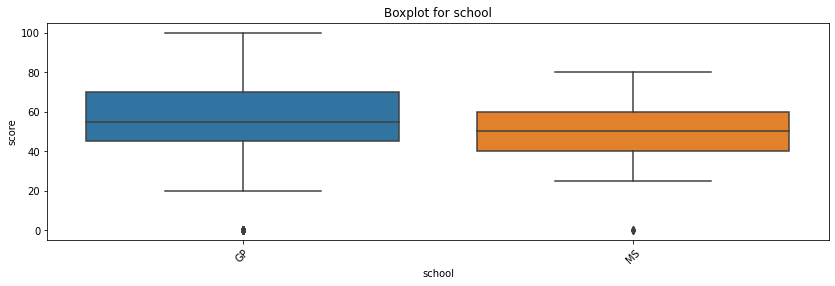

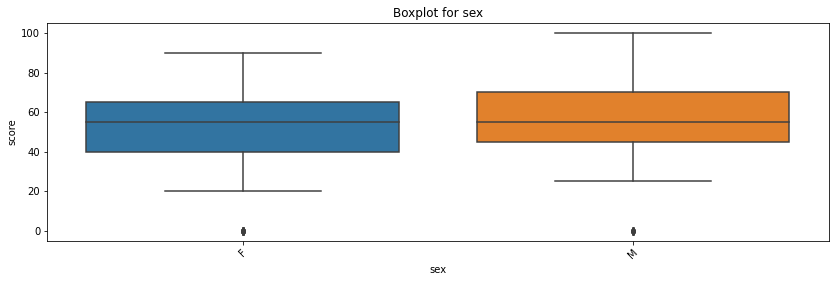

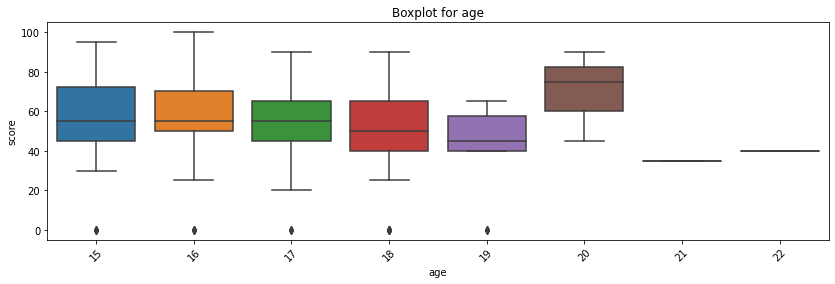

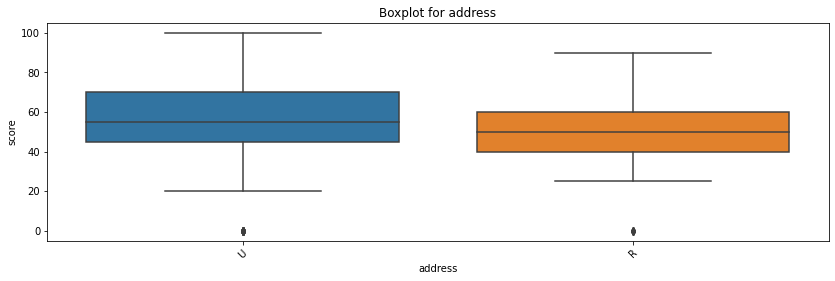

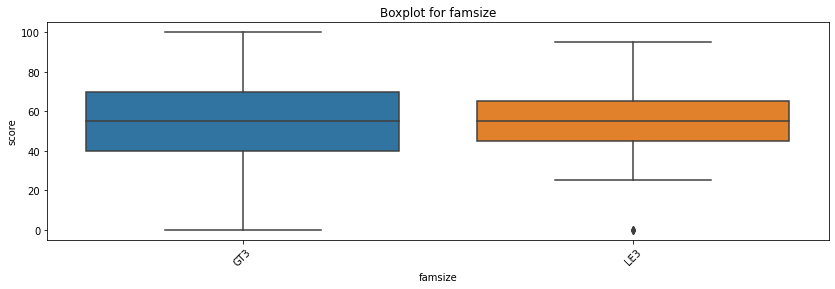

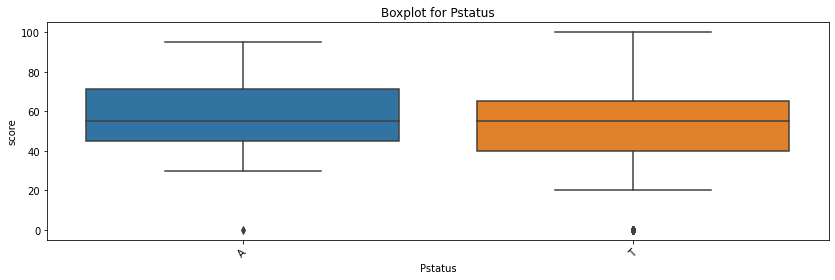

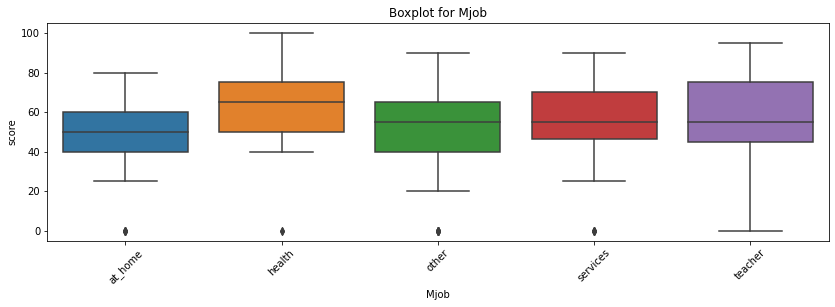

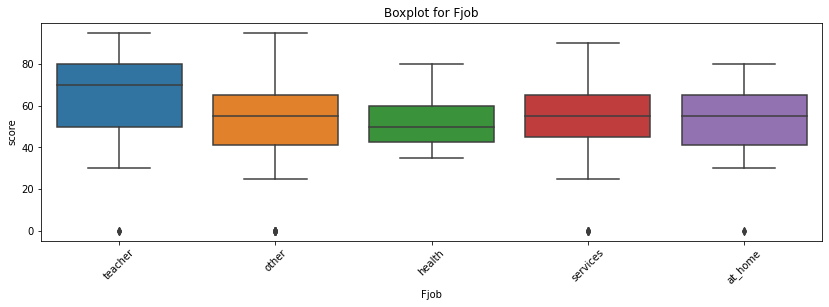

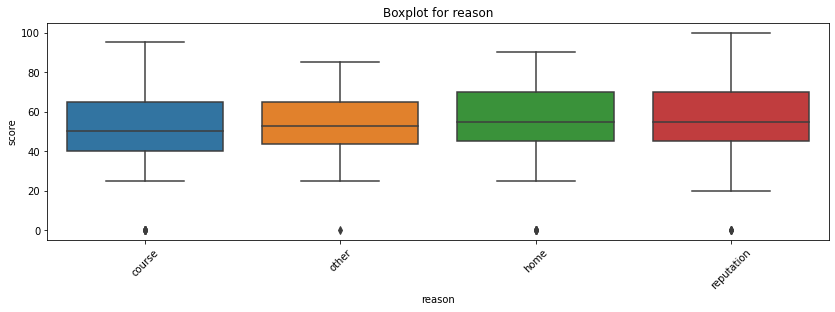

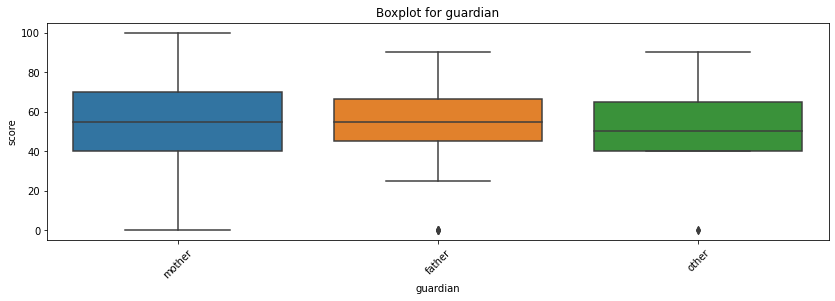

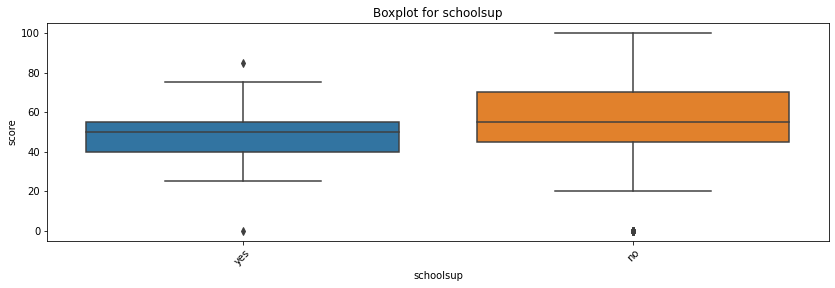

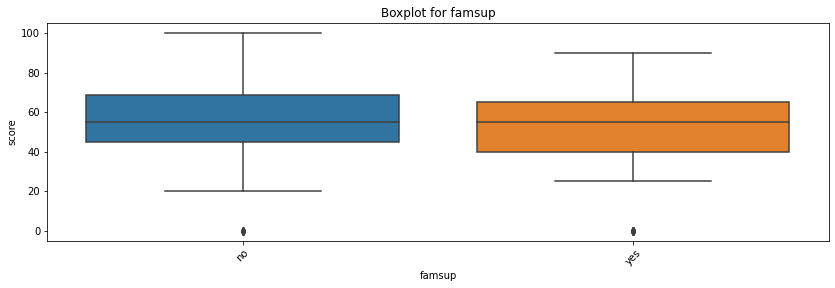

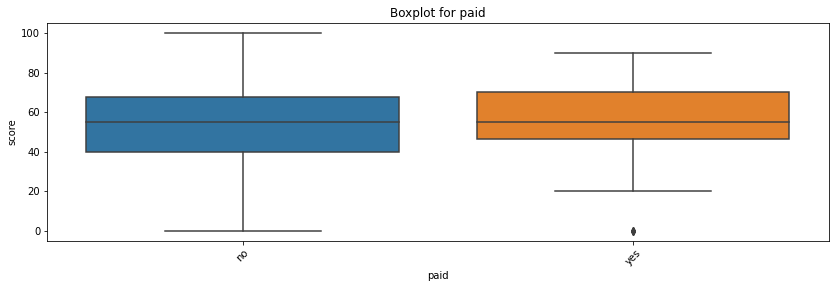

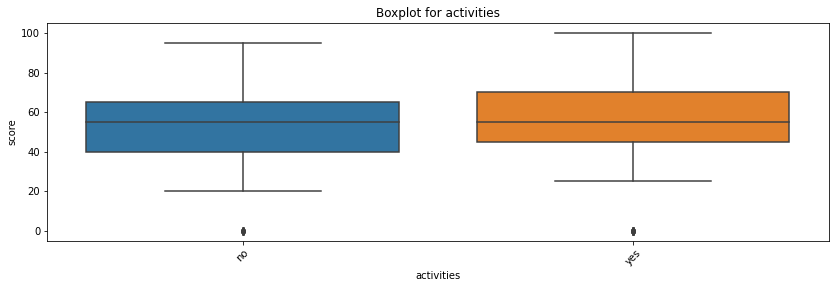

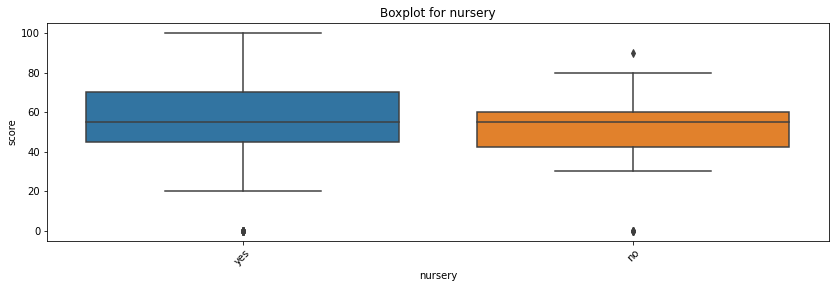

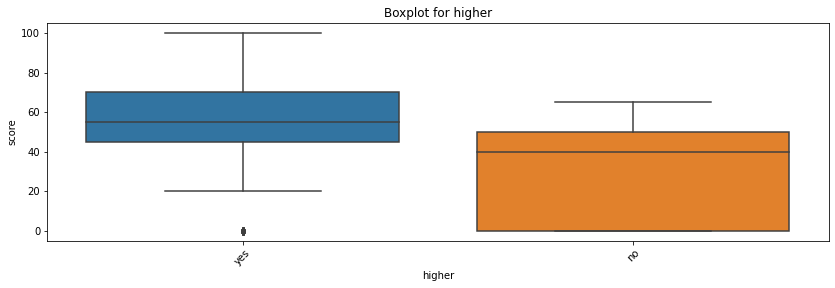

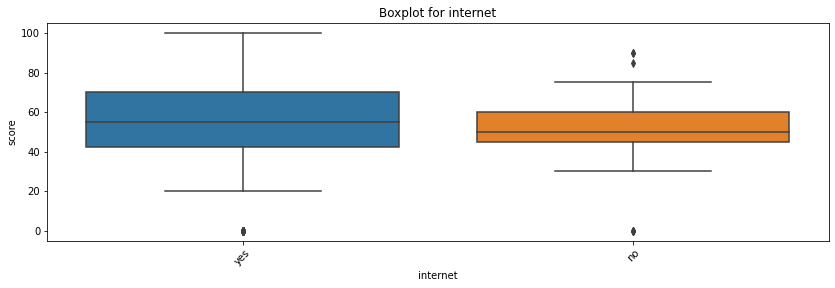

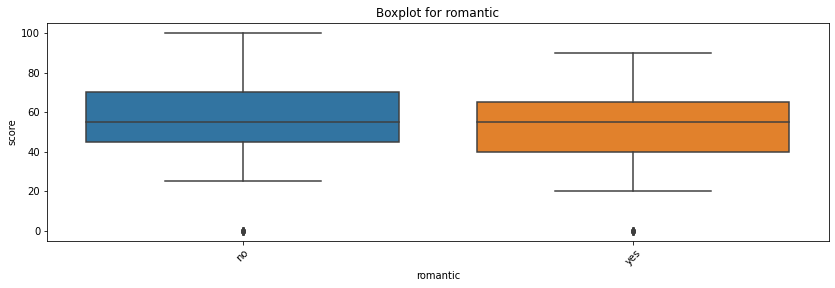

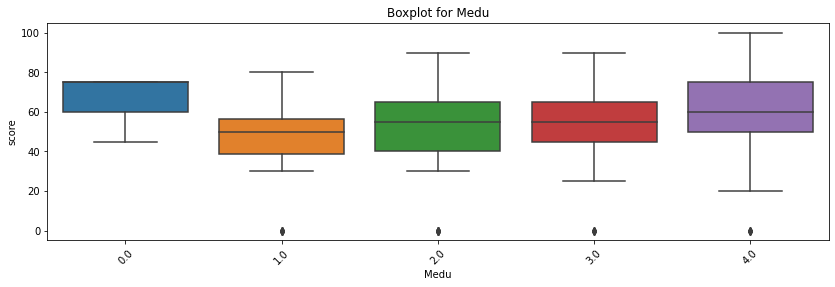

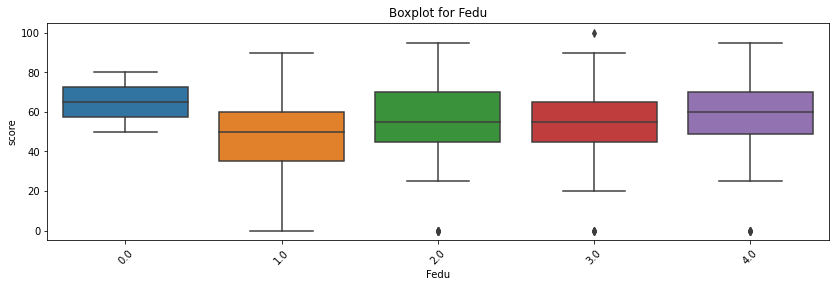

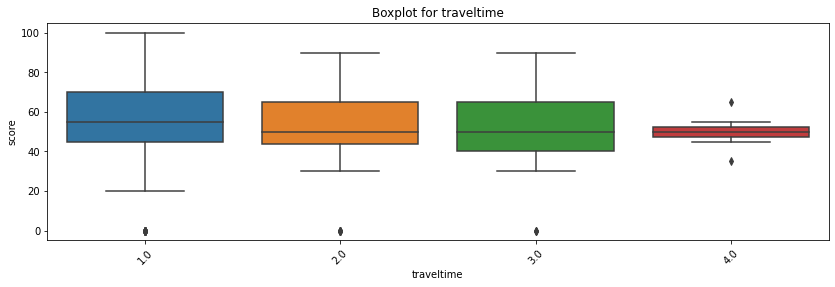

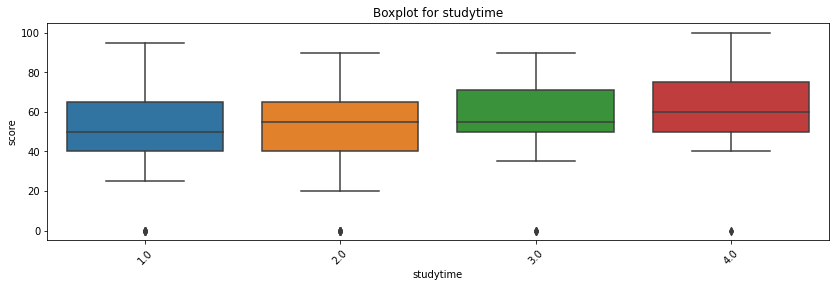

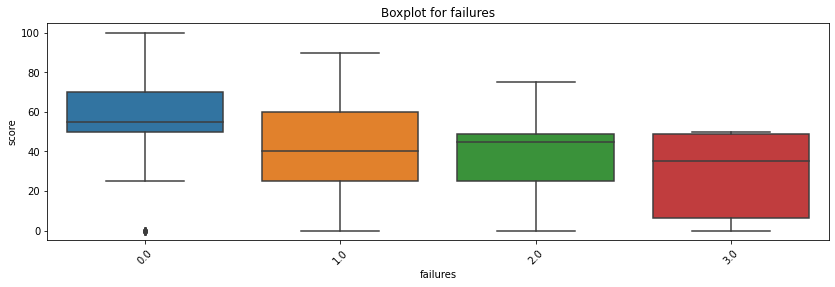

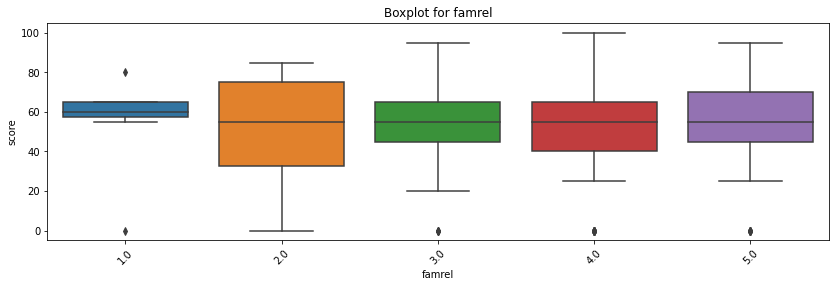

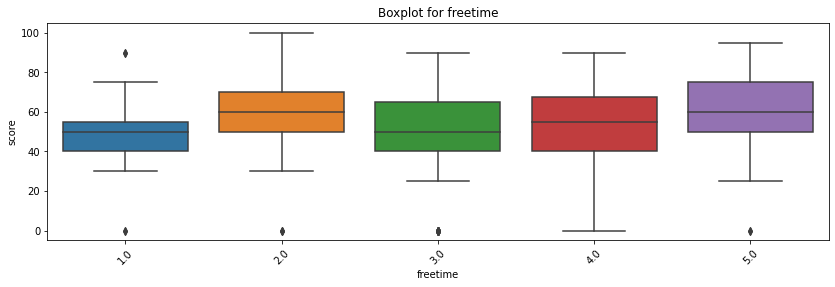

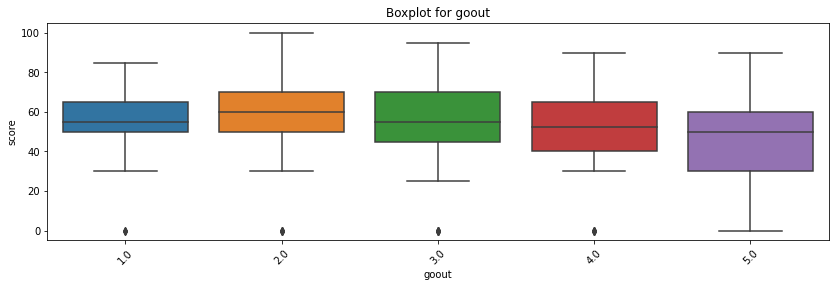

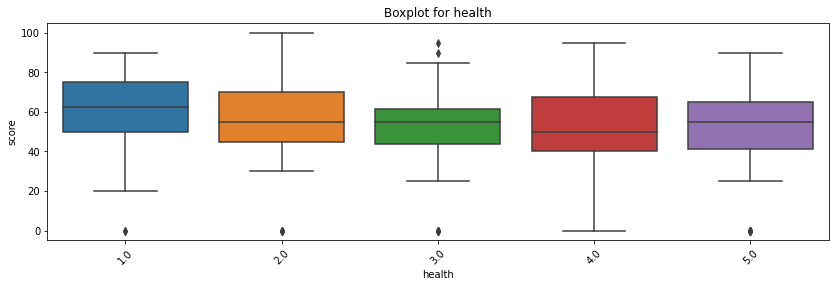

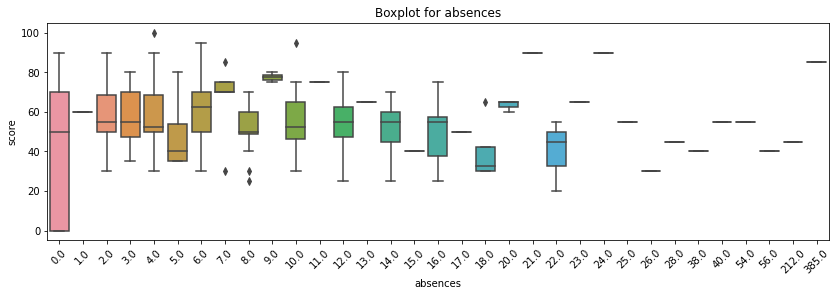

In [68]:
for col in ['school', 'sex', 'age','address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
          'reason', 'guardian',  'schoolsup', 'famsup', 
          'paid', 'activities', 'nursery', 'higher', 
          'internet', 'romantic', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures','famrel', 'freetime', 'goout', 
              'health', 'absences']:
    get_boxplot(col)

Проанализировав графики, я пришёл к выводу, что из данных можно исключить столбцы:
school, address, famsize, Pstatus, reason, guardian, famsup, activities, romantic

In [58]:
def get_stat_diff(col):
    cols = stud.loc[:, col].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, col]==comb[0], 'score'],
                    stud.loc[stud.loc[:, col]==comb[1], 'score']).pvalue <= 0.05/len(combinations_all):
            print('Найдены статистически значимые различия для колонки', col)
            break

In [71]:
for col in ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
          'reason', 'guardian',  'schoolsup', 'famsup', 
          'paid', 'activities', 'nursery', 'higher', 
          'internet', 'romantic', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures','famrel', 'freetime', 'goout', 
              'health', 'absences']:
    get_stat_diff(col)

Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки absences


Тест Стьюдента показал, что серёзно отличаются параметры: paid, higher, Medu, Fedu, failures, absences

In [76]:
# В результате останется датасет 
stud_for_model = stud.loc[:, ['sex', 'age', 'Mjob', 'Fjob', 
                              'schoolsup', 'paid', 'nursery', 'higher', 
                              'internet', 'Medu', 'Fedu', 'traveltime', 
                              'studytime', 'failures', 'famrel', 'freetime',
                              'absences']]
stud_for_model.head()

,sex,age,Mjob,Fjob,schoolsup,paid,nursery,higher,internet,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,absences
0,F,18,at_home,teacher,yes,no,yes,yes,None,4.0,4.0,2.0,2.0,0.0,4.0,3.0,6.0
1,F,17,at_home,other,no,no,no,yes,yes,1.0,1.0,1.0,2.0,0.0,5.0,3.0,4.0
2,F,15,at_home,other,yes,None,yes,yes,yes,1.0,1.0,1.0,2.0,3.0,4.0,3.0,10.0
3,F,15,health,None,no,yes,yes,yes,yes,4.0,2.0,1.0,3.0,0.0,3.0,2.0,2.0
4,F,16,other,other,no,yes,yes,yes,no,3.0,3.0,1.0,2.0,0.0,4.0,3.0,4.0


## Выводы

1) В данных было много пустых значений.

2) Выбросы былы в 2ух столбцах.

3) Самые важные параметры  для построения модели: paid, higher, Medu, Fedu, failures, absences

Но я бы использовал параметры из предыдущего блока, т.к. не уверен, что переход от 29 признаков к 6 поможет улучшить точность модели.
